In [2]:
import datetime
print("Last modified by Luke Shead: ", datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S") + "\n")

Last modified by Luke Shead:  15/12/2021 00:30:13



In [1]:
# ls792 submission of Assignment 4

# Task 1: Create a feature in your dataframe, called “unit_price”, that contains price per
# square foot for each sale.
import pandas as pd
import numpy as np

df = pd.read_csv("kc_house_data_small.csv")

df["unit_price"] = df["price"] / df["sqft_living"]

display(df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,unit_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847
1,1423800210,20140923T000000,230000.0,3,1.00,1640,7187,1.0,0,0,...,1640,0,1966,0,98058,47.4550,-122.182,1340,8346,140.243902
2,2125049131,20140729T000000,680000.0,3,1.75,1620,5500,1.0,0,0,...,1110,510,1950,0,98112,47.6393,-122.308,2100,6500,419.753086
3,5318101765,20140602T000000,985000.0,3,1.75,1670,5400,2.0,0,0,...,1670,0,1912,0,98112,47.6350,-122.284,2100,5400,589.820359
4,6624300110,20140623T000000,375000.0,4,2.50,1870,7471,2.0,0,0,...,1870,0,1990,0,98055,47.4314,-122.204,2020,8912,200.534759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,235.294118
2609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,173.160173
2610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,394.216667
2611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,250.000000


In [2]:
# Task 2: Create a dataframe that consists of two columns. The columns are “zipcode”
# and average price per square foot in the corresponding zip code. Each zip code
# will have its own row, and second column will be the mean price of all the sales
# in said zip code.

#zipcode = df["zipcode"]
#price = df["price"]
#toggle = list(zip(zipcode, price))

newdf = pd.DataFrame(df.groupby(["zipcode"])["price"].mean())

display(newdf)


,price
zipcode,
98001,3.402646e+05
98002,2.696963e+05
98003,3.222922e+05
98004,1.559803e+06
98005,7.887749e+05
...,...
98177,6.343395e+05
98178,3.202654e+05
98188,3.274393e+05


[295000.0, 354108.7, 422607.8, 473592.0, 662161.1, 800086.1, 930436.9, 1040950.0, 676666.7, 650000.0]


Text(0.5, 1.0, 'Mean price of sales per bedroom quantity in houses')

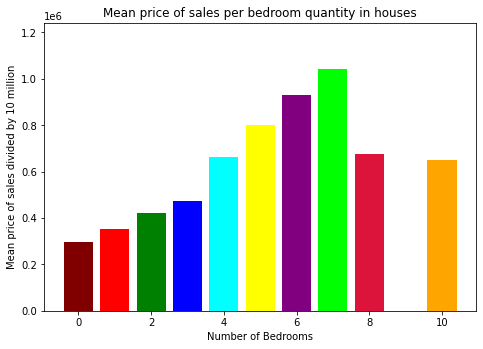

In [199]:
# Task 3: Create a dataframe with two columns: bedrooms and mean price. Each unique
# count of bedrooms will have its own row, and the second column will be the
# mean price for properties with that many bedrooms. Use a bar plot to display
# your dataframe. Give each bar its own colour.
import matplotlib.pyplot as plt

newdf2 = pd.DataFrame(df.groupby(["bedrooms"])["price"].mean())
newdf2["price"] = newdf2["price"].round(1)
#print(newdf2)

amntofbed = newdf2.index.tolist()
pricelist = newdf2["price"].tolist()

print(pricelist)
#print(amntofbed)

fig = plt.figure()
axis = fig.add_axes([1,1,1,1])

scale = 1240950
ymin, ymax = plt.ylim()
plt.ylim(ymin * scale, ymax * scale)



axis.bar(amntofbed, pricelist, color =['maroon', 
                                   'red', 
                                   'green', 
                                   'blue', 
                                   'cyan', 
                                   'yellow', 
                                   "purple", 
                                   "lime", 
                                   "crimson", 
                                   "orange"])

#edit the x and y axis with xticks and yticks
plt.xticks()
plt.yticks()
plt.xlabel('Number of Bedrooms')
plt.ylabel('Mean price of sales divided by 10 million')
plt.title("Mean price of sales per bedroom quantity in houses")

73      47.3449
85      47.3554
112     47.7142
175     47.5287
252     47.7134
856     47.3311
1031    47.5188
1039    47.7175
1325    47.5283
1767    47.5724
2201    47.5285
2576    47.5943
Name: lat, dtype: float64


/tmp/ipykernel_2338607/2546258610.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axis.plot(truelong, truelat, "bo", C = "red")


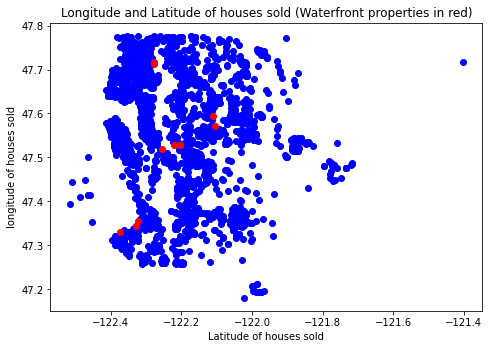

In [3]:
# Task 4: Graph “long” versus “lat”. Colour the waterfront properties red, and all others
# as blue. Title the plot and label the axis appropriately.
import matplotlib.pyplot as plt

wtrtrue = df[df["waterfront"] == 1]
wtrfalse = df[df["waterfront"] == 0]

truelong = wtrtrue["long"]
truelat = wtrtrue["lat"]
falselong = wtrfalse["long"]
falselat = wtrfalse["lat"]

fig = plt.figure()
axis = fig.add_axes([1,1,1,1])


axis.plot(falselong, falselat, "bo")

axis.plot(truelong, truelat, "bo", C = "red")
plt.title("Longitude and Latitude of houses sold (Waterfront properties in red)")
plt.xlabel('Latitude of houses sold')
plt.ylabel('longitude of houses sold')



print(truelat)
